## Assignment 3 – Iris Dataset


# Step 1: Import Libraries

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# Step 2: Upload and Load the Dataset

In [ ]:
uploaded = files.upload()

import os
os.listdir()

# Load the iris dataset
df = pd.read_csv('iris.csv')
df.head()

Saving iris.csv to iris.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Step 3: Preprocessing and EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


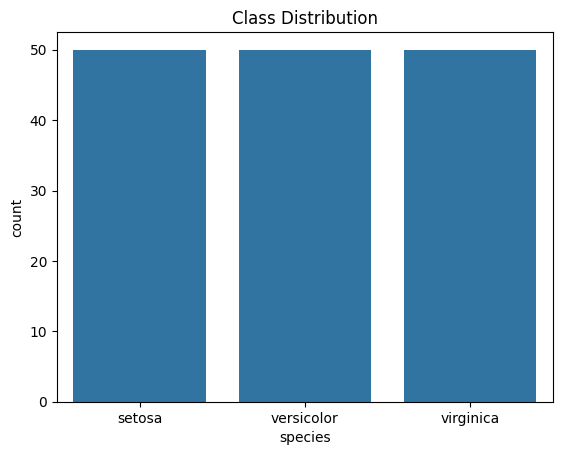

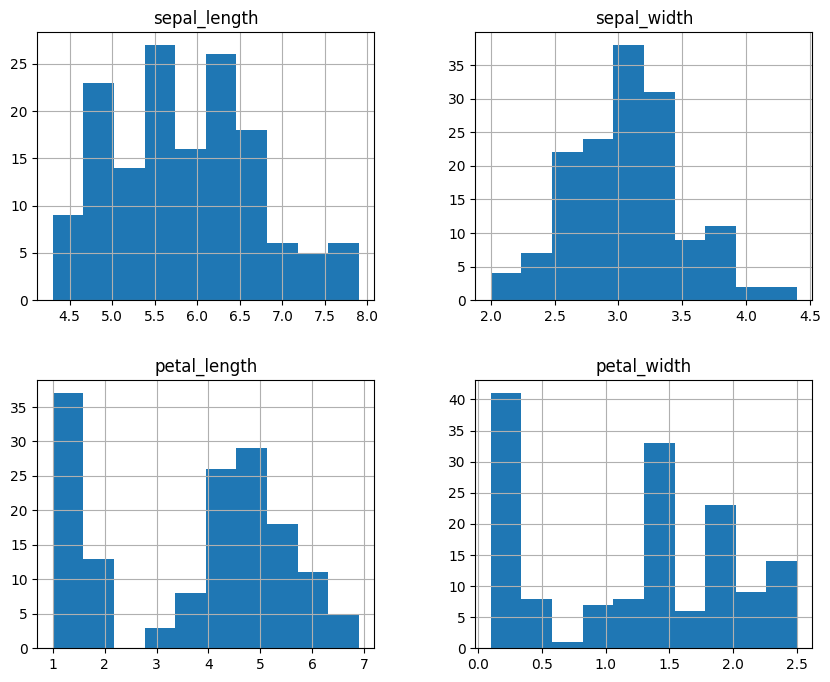

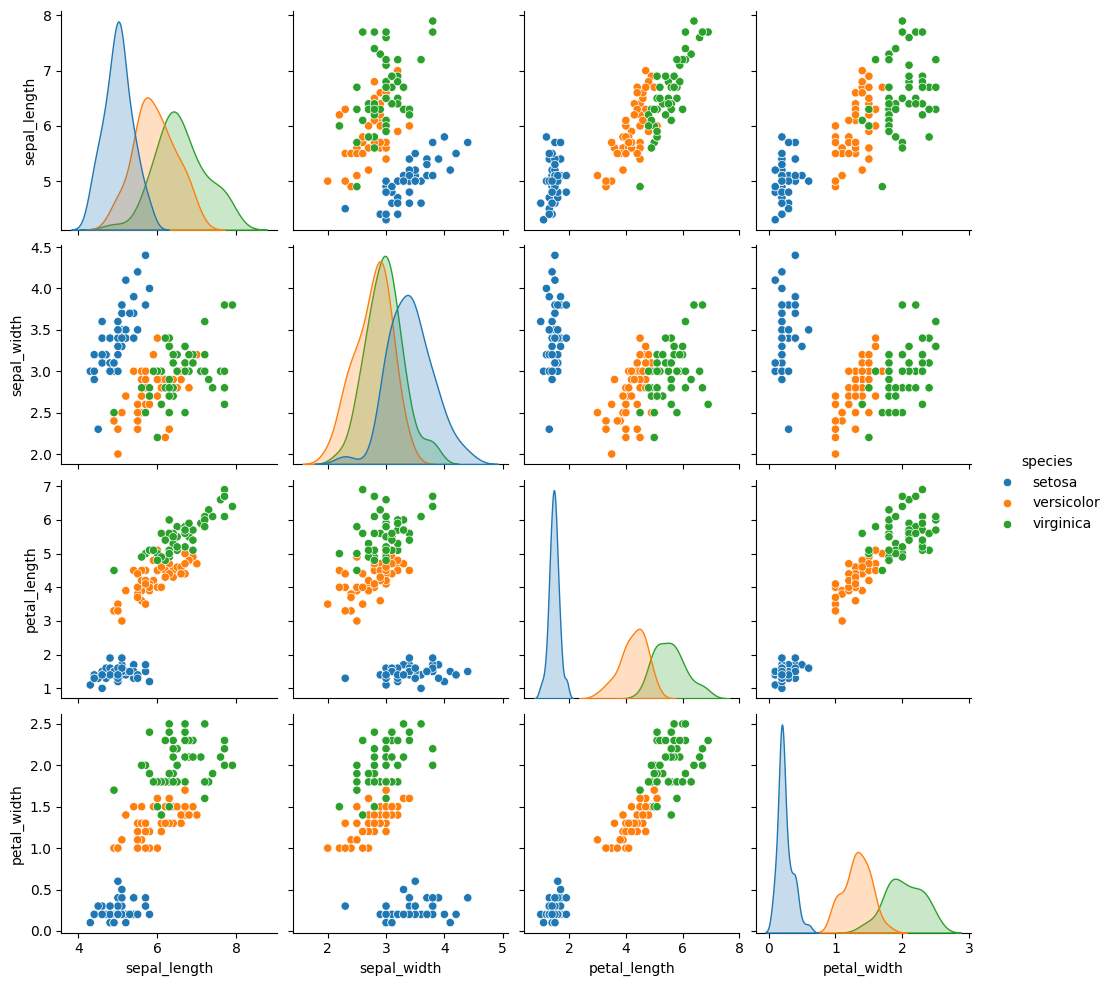

Train size: 105
Test size: 45


In [ ]:
# Check dataset info
df.info()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Class balance
sns.countplot(x='species', data=df)
plt.title('Class Distribution')
plt.show()

# Histograms of features
df.hist(figsize=(10, 8))
plt.show()

# Pair plot (optional, but nice visualization)
sns.pairplot(df, hue='species')
plt.show()

# Encode target labels
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

# Separate features and target
X = df.drop(['species', 'species_encoded'], axis=1)
y = df['species_encoded']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


# Step 4: Support Vector Machine (SVM)


Kernel: linear
Accuracy: 0.9111


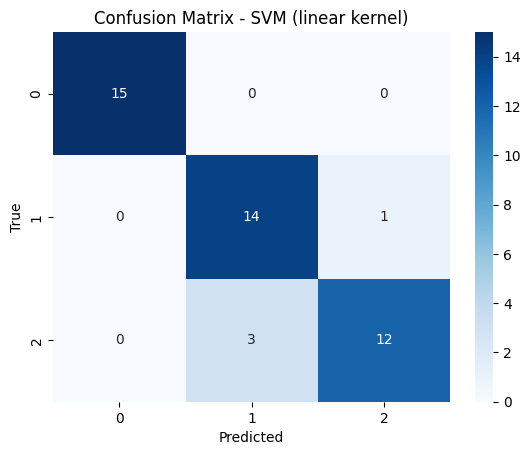

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Kernel: poly
Accuracy: 0.8667


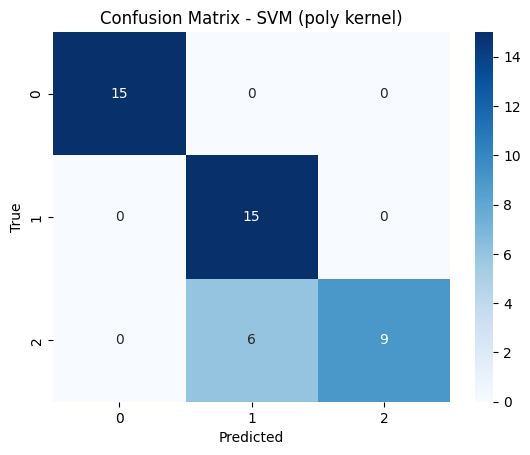

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.71      1.00      0.83        15
           2       1.00      0.60      0.75        15

    accuracy                           0.87        45
   macro avg       0.90      0.87      0.86        45
weighted avg       0.90      0.87      0.86        45


Kernel: rbf
Accuracy: 0.9111


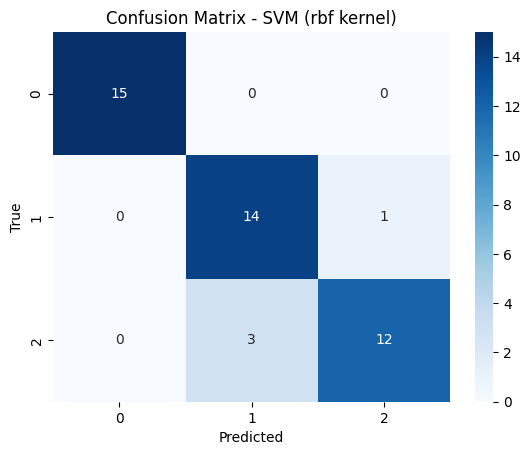

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [ ]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    print(f"\nKernel: {kernel}")
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - SVM ({kernel} kernel)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("Classification Report:\n", classification_report(y_test, y_pred))


# Step 5: Neural Network (Keras)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.1450 - loss: 1.1166 - val_accuracy: 0.1905 - val_loss: 1.1040
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1774 - loss: 1.0597 - val_accuracy: 0.3810 - val_loss: 1.0442
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5367 - loss: 0.9455 - val_accuracy: 0.5238 - val_loss: 0.9887
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7189 - loss: 0.9264 - val_accuracy: 0.7143 - val_loss: 0.9411
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7372 - loss: 0.8994 - val_accuracy: 0.7619 - val_loss: 0.8956
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7608 - loss: 0.8576 - val_accuracy: 0.7619 - val_loss: 0.8529
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7849 - loss: 0.7820 - val_accuracy: 0.8095 - val_loss: 0.8120
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8162 - loss: 0.7444 - val_accuracy: 0.9048 - val_loss

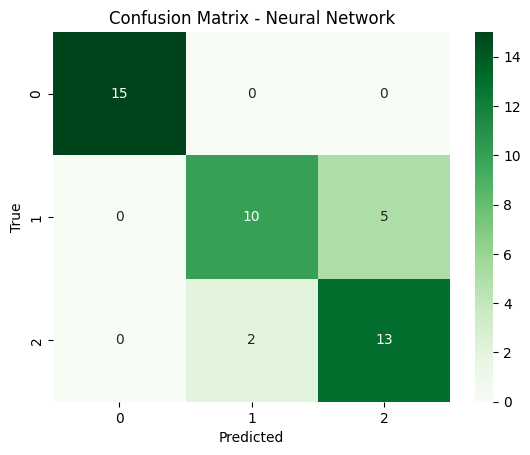

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.83      0.67      0.74        15
           2       0.72      0.87      0.79        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45



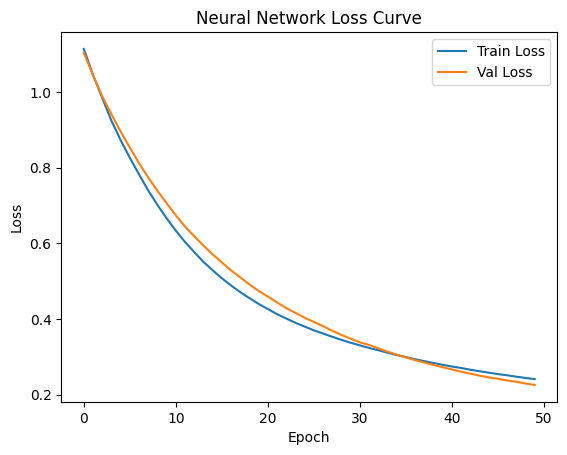

In [ ]:
# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))  # one hidden layer with ReLU
model.add(Dense(3, activation='softmax'))  # 3 classes

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train_cat, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"\nNeural Network Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred_nn = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

# Plot Loss Curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Neural Network Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Summary of Model Comparison


- **SVM Results:**
    - Linear kernel: [0.9111]
    - Polynomial kernel: [0.8667]
    - RBF kernel: [0.9111]

- **Neural Network Results:**
    - Test Accuracy: [0.8444]

- **Confusion Matrices** plotted for both models.

- **Analysis:**
    - Compare precision, recall, F1-scores.
    - Discuss which model performed better.
